In [4]:
# 2dbinned stats
import os
import numpy as np
import h5py
from scipy.stats import binned_statistic_2d
import pyproj
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfea
from pyproj import Transformer
# import MisrToolkit as Mtk
from datetime import datetime
import gc
import pandas as pd
from netCDF4 import Dataset
import xarray as xr
from joblib import dump, load


In [2]:
Globe = ccrs.Globe(ellipse='WGS84', towgs84=[0,0,0,0,0,0,0])
Projection = ccrs.LambertAzimuthalEqualArea(central_longitude=0.0, central_latitude=90.0, false_easting=0.0, false_northing=0.0, globe=Globe)



import cartopy.feature as cfeature
land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
edgecolor='face',
facecolor=cfeature.COLORS['land'])



land = cfeature.COASTLINE

In [3]:
# import numpy as np
# # import pandas as pd
# # import struct
# # import xarray as xr
# import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap
# # import scipy.io
# # from scipy.sparse import spdiags
# # import pickle


# from netCDF4 import Dataset
# import matplotlib.pyplot as plt



# 1) Bathymetry 

In [4]:
#/Users/micheltsamados/Documents/Data/Bathymetry/BedmachineAntarctica/189467428/BedMachineAntarctica_2020-07-15_v02.nc

In [5]:
# path='/Users/micheltsamados/Documents/Data/Bathymetry/BedmachineAntarctica/189467428/'
# file='BedMachineAntarctica_2020-07-15_v02.nc'
# data=Dataset(path+file,"r")
# # SIC=np.asarray(data_SIC.variables['sic'])
# bathy=data.variables['bed']

In [11]:
#Load IBCAO (Smith's) projection https://download.gebco.net/
# filepath2='/Users/micheltsamados/Dropbox/ThomasJohnson/MISR_bathymetry/'
# data2=Dataset(filepath2+'IBCAO_v4_200m.nc',"r") 
# data2=Dataset('/Users/micheltsamados/Dropbox/ThomasJohnson/MISR_bathymetry/IBCAO_v4_200m.nc',"r")
# depth2=data2.variables['z'][:,:]

# df = xr.open_dataset('/Users/micheltsamados/Dropbox/ThomasJohnson/MISR_bathymetry/IBCAO_v4_200m.nc')
df = xr.open_dataset('/Users/micheltsamados/Documents/Data/Bathymetry/IBCAO_v4_1_400m.nc')

In [10]:
! ls /Users/micheltsamados/Documents/Data/Bathymetry

BedMachineAntarctica_2020-07-15_v02.nc IBCSO_v2_bed_WGS84.nc
IBCAO_v4_1_400m.nc


In [12]:
df

<xarray.Dataset>
Dimensions:  (x: 14550, y: 14550)
Coordinates:
  * x        (x) float64 -2.91e+06 -2.909e+06 -2.909e+06 ... 2.909e+06 2.91e+06
  * y        (y) float64 -2.91e+06 -2.909e+06 -2.909e+06 ... 2.909e+06 2.91e+06
Data variables:
    z        (y, x) float32 ...
Attributes:
    Conventions:  COARDS, CF-1.5
    title:        Produced by grdconvert
    history:      grdconvert cut/ibcao_v4.1_400m.tiff cut/ibcao_v4.1_400m.nc
    description:  
    GMT_version:  5.4.5 [64-bit]
    node_offset:  1

In [19]:
gebco_grid = Dataset('/Users/micheltsamados/Documents/Data/Bathymetry/gebco_2021_tid/GEBCO_2021_TID.nc')

In [29]:
gebco_grid['tid']

<class 'netCDF4._netCDF4.Variable'>
int8 tid(lat, lon)
    long_name: GEBCO Type Identifier
    units: 1.0
    grid_mapping: crs
    sdn_parameter_urn: SDN:P01::GEBCOSRC
    sdn_parameter_name: Source identifer of GEBCO grid cell data
    sdn_uom_urn: SDN:P06:UUUU
    sdn_uom_name: Dimensionless
    flag_values: [ 0 10 11 12 13 14 15 16 17 40 41 42 43 44 45 46 70 71 72]
    flag_meanings: Land Singlebeam Multibeam Seismic Isolated_sounding ENC_sounding Lidar Optical Combined predicted_altimetry interpolated contour_charts contour_ENC bathymetric_sounding predicted_airborne iceberg_groundingpre-generated_grid unknown steering_point
unlimited dimensions: 
current shape = (43200, 86400)
filling on, default _FillValue of -127 ignored

In [17]:
! ls /Users/micheltsamados/Documents/Data/Bathymetry/gebco_2021_tid

GEBCO_2021_Grid.pdf         GEBCO_Grid_terms_of_use.pdf
GEBCO_2021_TID.nc


In [7]:
# data2.variables.keys()

NameError: name 'data2' is not defined

In [13]:
# bathy=data.variables['bed']

NameError: name 'data' is not defined

In [9]:
xtemp=np.linspace(-2910000., 2910000.,29100)
ytemp=np.linspace(-2910000., 2910000.,29100)

xtest2,ytest2=np.meshgrid(xtemp,ytemp)

In [33]:
# np.asarray(xtest2)

In [34]:
# xtest2.shape

In [35]:
# bathy_mask=np.asarray(bathy).copy()

In [32]:
# depth2.shape

In [31]:
# import scipy.io
# from scipy.interpolate import griddata


# # xtest2, ytest = WGS84toEASE2(lon_TOPAZ, lat_TOPAZ)
# # xx, yy = WGS84toEASE2(lon, lat)


# # x, y = m(lon_Osisaf, lat_Osisaf)
# # x, y = m(lon, lat)
# depth_MISR2_nn=griddata((xtest2[::10,::10].ravel(), ytest2[::10,::10].ravel()),depth2[::10,::10].ravel(), (xx, yy), method='nearest')
 




In [ ]:
# depth_MISR2_nn.shape

In [ ]:
# depth2.shape

In [36]:
# depth2_grad_mag.shape

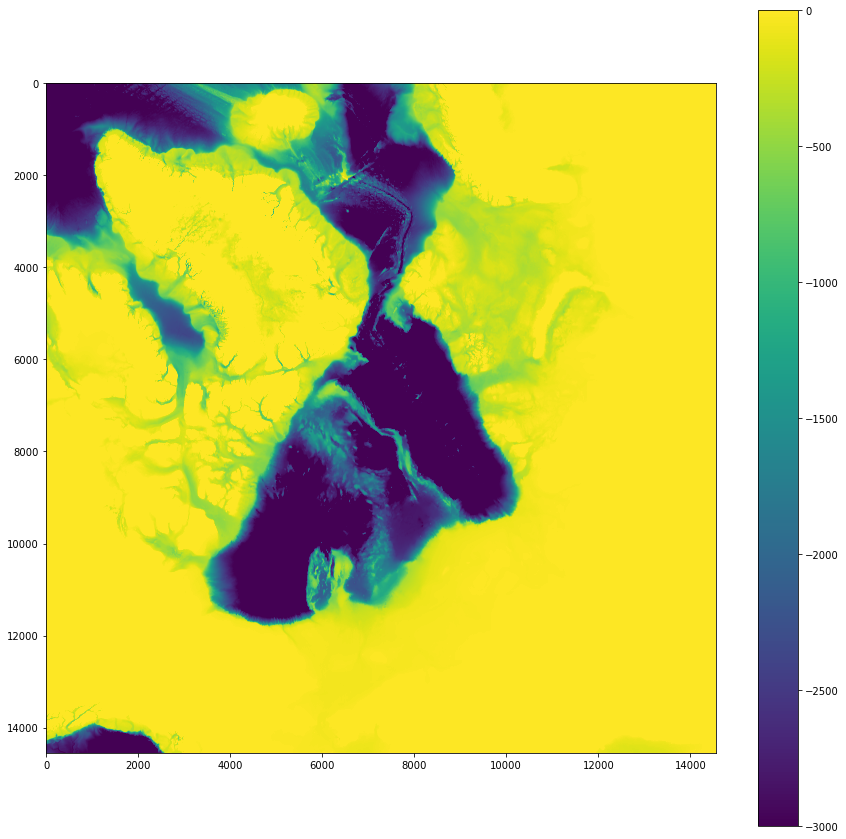

In [30]:
plt.clf()
plt.close()
plt.figure(figsize=(15,15))
plt.imshow(df.z,vmin=-3000,vmax=0)
plt.colorbar()

In [37]:
# plt.clf()
# plt.close()
# plt.figure(figsize=(15,15))
# s=10
# plt.imshow(depth2[::s,::s],vmin=-3000,vmax=0)
# # plt.pcolor(bathy_mask)
# plt.colorbar()

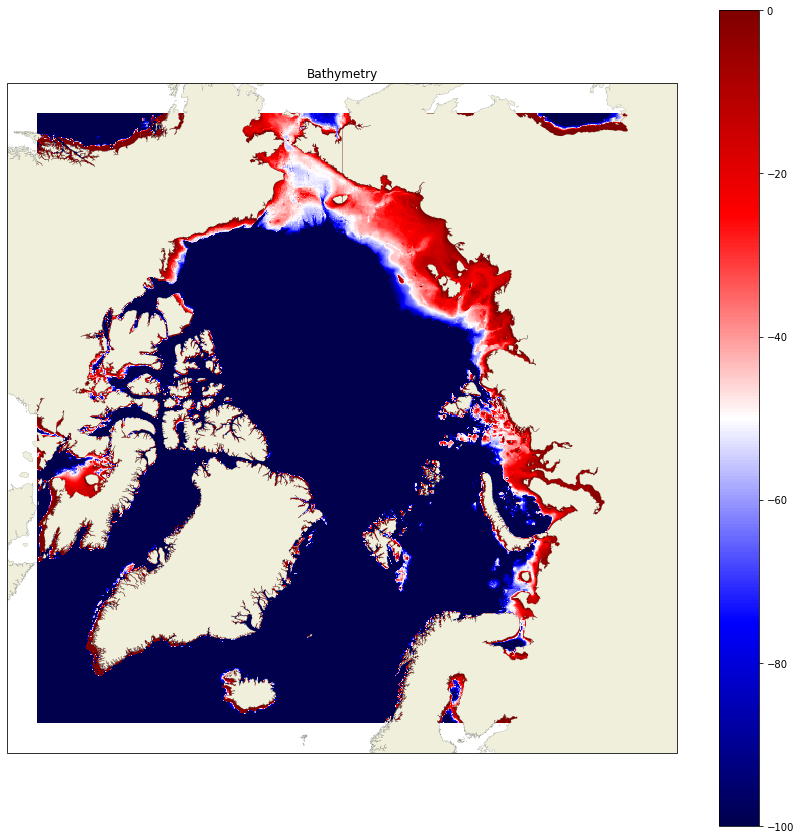

In [23]:
plt.figure(figsize=(15,15))
ax = plt.axes(projection = Projection)
plt.title('Bathymetry')
s=50
plt.pcolormesh(xtest2[::s,::s], ytest2[::s,::s], depth2[::s,::s], zorder=0 ,vmin=-100, vmax=0, cmap='seismic')
ax.add_feature(land_10m, zorder=1, edgecolor='black', linewidth=0.1)
plt.colorbar()
# plt.savefig('Bathymetry_Arctic_small.png', dpi = 400)

In [38]:
depth2_grad = np.gradient(df.z)
depth2_grad_mag=depth2_grad[0]**2.+depth2_grad[1]**2.

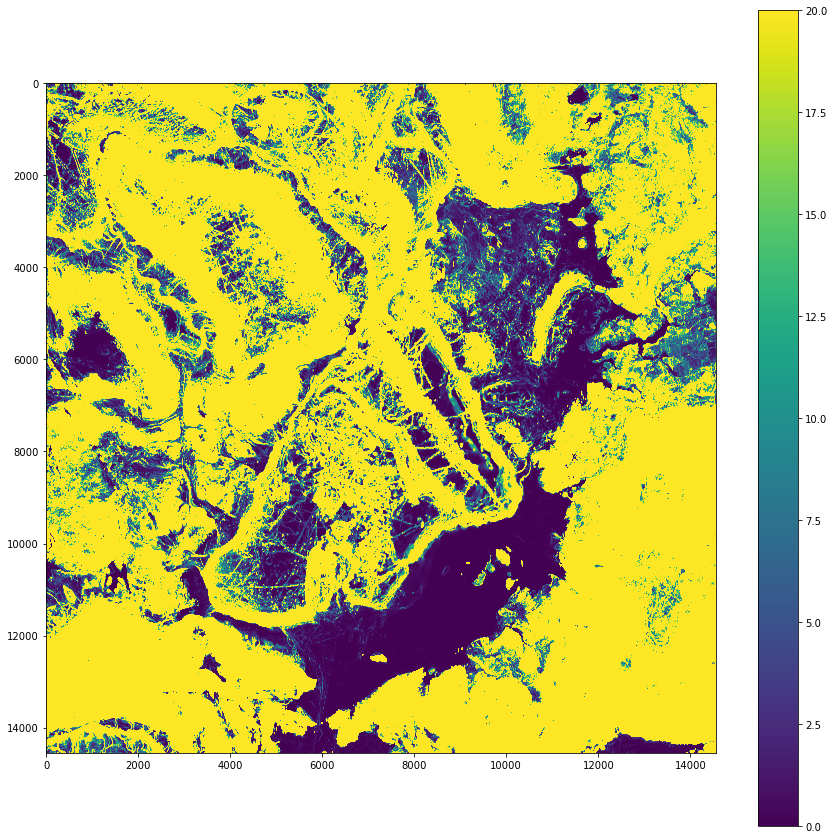

In [41]:
plt.clf()
plt.close()
plt.figure(figsize=(15,15))
plt.imshow(depth2_grad_mag,vmin=0,vmax=20)
plt.colorbar()

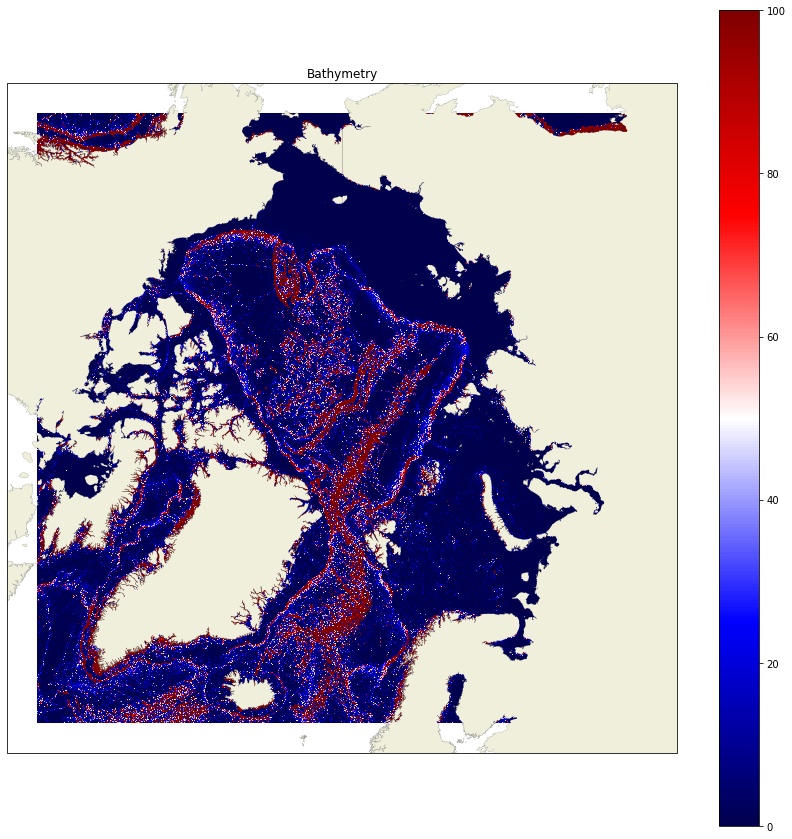

In [49]:
plt.figure(figsize=(15,15))
ax = plt.axes(projection = Projection)
plt.title('Bathymetry')
s=50
plt.pcolormesh(xtest2[::s,::s], ytest2[::s,::s], depth2_grad_mag[::s,::s], zorder=0 ,vmin=0, vmax=100, cmap='seismic')
# plt.pcolormesh(xtest2[::s,::s], ytest2[::s,::s], depth2_grad_mag[::s,::s], zorder=0 ,vmin=0, vmax=100, cmap='seismic')
ax.add_feature(land_10m, zorder=1, edgecolor='black', linewidth=0.1)
plt.colorbar()
# plt.savefig('Bathymetry_Arctic_grad_small.png', dpi = 400)

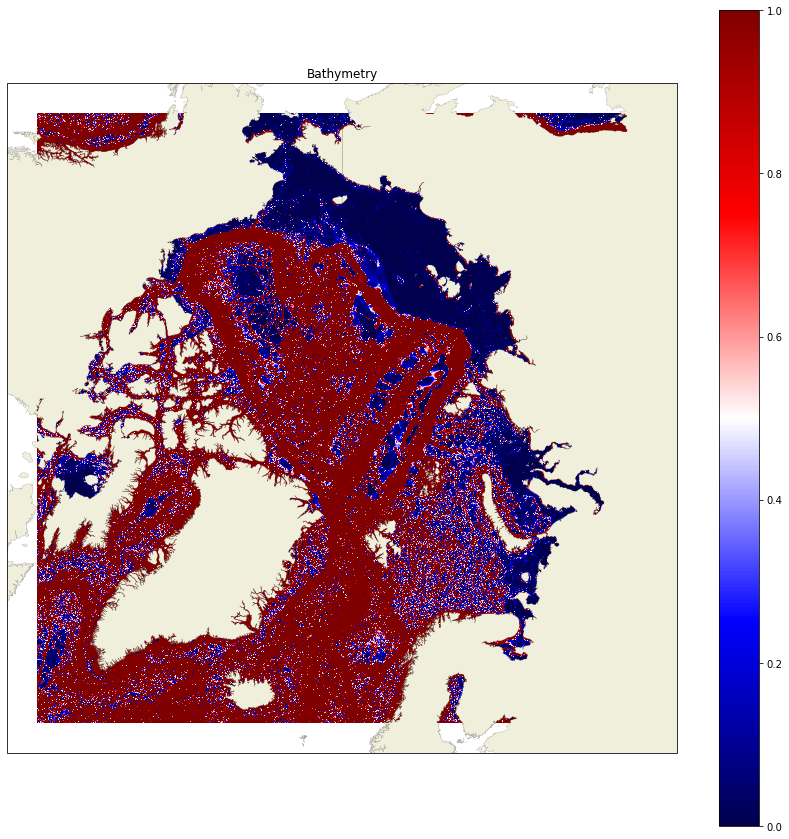

In [51]:
plt.figure(figsize=(15,15))
ax = plt.axes(projection = Projection)
plt.title('Bathymetry')
s=5
plt.pcolormesh(xtest2[::s,::s], ytest2[::s,::s], depth2_grad_mag[::s,::s], zorder=0 ,vmin=0, vmax=1, cmap='seismic')
ax.add_feature(land_10m, zorder=1, edgecolor='black', linewidth=0.1)
plt.colorbar()
plt.savefig('Bathymetry_Arctic_grad_small3.png', dpi = 400)

In [ ]:
plt.figure(figsize=(15,15))
ax = plt.axes(projection = Projection)
plt.title('Bathymetry')
s=2
plt.pcolormesh(xtest2[::s,::s], ytest2[::s,::s], depth2_grad_mag[::s,::s], zorder=0 ,vmin=0, vmax=1000, cmap='seismic')
ax.add_feature(land_10m, zorder=1, edgecolor='black', linewidth=0.1)
plt.colorbar()
plt.savefig('Bathymetry_Arctic_grad_fine.png', dpi = 400)

# 2) Roughness

In [27]:
! pwd

/Users/micheltsamados/My Drive/ADMINISTRATION/ESA_ITT_ALBATROS_Tides/PM2_20211201


In [26]:
# path2='/Users/micheltsamados/Documents/Data/MISR_roughness/Antarctic/'

ROUGHNESS_DIR = '/Users/micheltsamados/Dropbox/ThomasJohnson/MISR_bathymetry/'

In [27]:
# Define some stuff
Globe = ccrs.Globe(ellipse='WGS84', towgs84=[0,0,0,0,0,0,0])
Projection = ccrs.LambertAzimuthalEqualArea(central_longitude=0.0, central_latitude=90.0, false_easting=0.0, false_northing=0.0, globe=Globe)
os.chdir(ROUGHNESS_DIR)

import cartopy.feature as cfeature
land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])

land = cfeature.COASTLINE

In [28]:
def LoadH5(h5name, h5file):
    HDF5 = h5file.get(h5name)
    NP = np.array(HDF5)
    return NP

# Old pyproj conversion fns - for compatibility with lower versions of pyproj used in basemap
def EASE2toWGS84(x, y):
    proj_EASE2 = pyproj.Proj("+proj=laea +lon_0=0 +lat_0=90 +x_0=0 +y_0=0 +ellps=WGS84 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs")
    proj_WGS84 = pyproj.Proj("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs ")
    lon, lat = pyproj.transform(proj_EASE2, proj_WGS84, x, y)
    return lon, lat

def WGS84toEASE2(lon, lat):
    proj_EASE2 = pyproj.Proj("+proj=laea +lon_0=0 +lat_0=90 +x_0=0 +y_0=0 +ellps=WGS84 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs")
    proj_WGS84 = pyproj.Proj("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs ")
    x , y = pyproj.transform(proj_WGS84, proj_EASE2, lon, lat)
    return x, y

In [29]:
# h5name = ROUGHNESS_DIR+'April '+str(2016)+' Monthly Binned.h5'
# h5name = '/Users/micheltsamados/Dropbox/ThomasJohnson/MISR_bathymetry/April 2016 Monthly Binned.h5'
h5name = ROUGHNESS_DIR+'April Monthly Binned_ALL.h5'
h = h5py.File(h5name, 'r')
lat = LoadH5('GeoLocation/Latitude', h)
lon = LoadH5('GeoLocation/Longitude', h)
xx, yy = WGS84toEASE2(lon, lat)
roughness = LoadH5('Roughness/Roughness_2D_svm', h)
count = LoadH5('Count/Count_2D_svm', h)
std = LoadH5('Std/Std_2D_svm', h)

/Users/micheltsamados/miniconda3/envs/icesat2020/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  app.launch_new_instance()


In [30]:
count.shape

(5000, 5000)

In [31]:
roughness.shape

(5000, 5000)

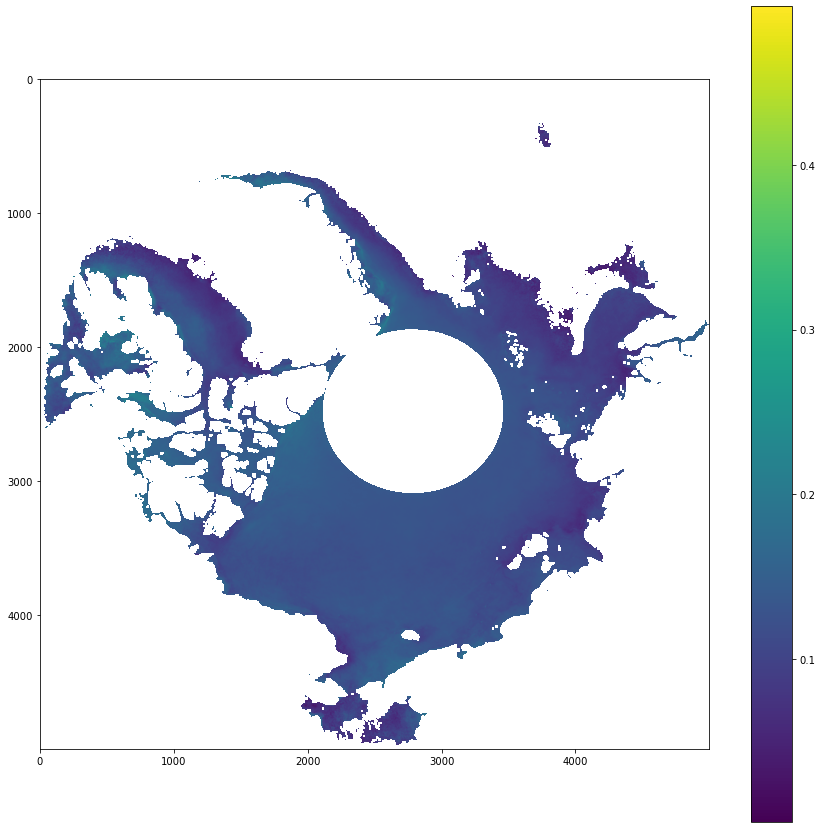

In [32]:
plt.clf()
plt.close()
plt.figure(figsize=(15,15))
plt.imshow(roughness)#,vmin=-3000,vmax=0)
plt.colorbar()

In [33]:
xx.shape

(5001, 5001)

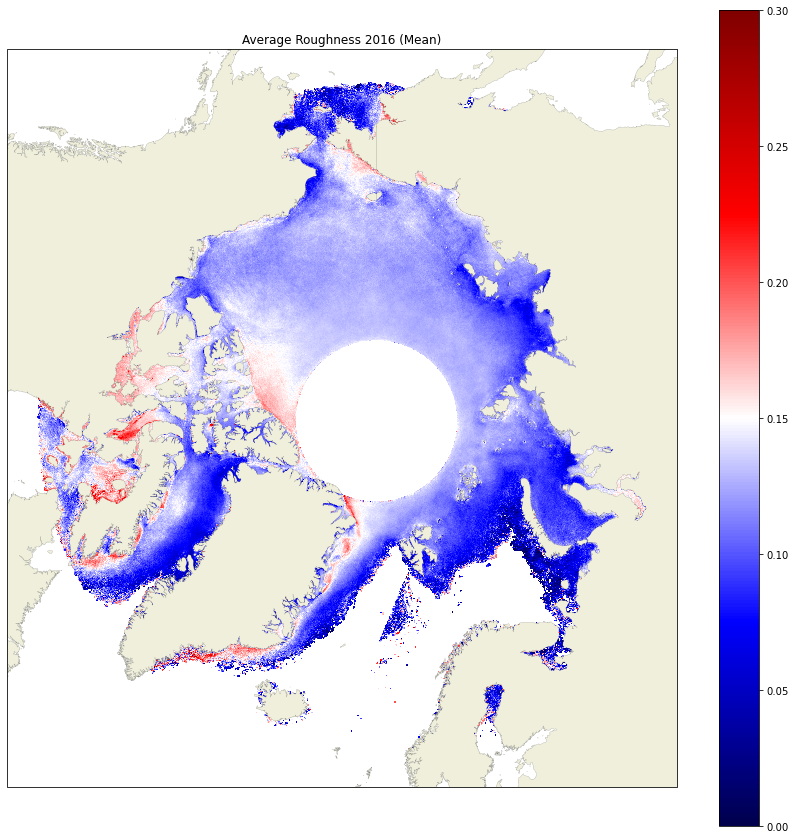

In [34]:
plt.figure(figsize=(15,15))

ax = plt.axes(projection = Projection)
plt.title('Average Roughness 2016 (Mean)')
s=2
plt.pcolormesh(xx[::s,::s], yy[::s,::s], roughness[::s,::s], zorder=0 ,vmin=0, vmax=0.3, cmap='seismic')
ax.add_feature(land_10m, zorder=1, edgecolor='black', linewidth=0.1)
plt.colorbar()
# plt.savefig('A_2016_Roughness_Mean_fine.png', dpi = 400)




# 3) Tides

In [35]:
P = pyproj.Proj("+proj=laea +lon_0=0 +lat_0=90 +x_0=0 +y_0=0 +ellps=WGS84 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs")



In [36]:
! ls /Users/micheltsamados/Documents/Data/Tides

Tide_gauge_time_series
meanvelocity_FES2014_Antarctica_Sept2017.nc
meanvelocity_FES2014_Arctic_March2019.nc
tidal_dissipation_diags


In [37]:
path_tides='/Users/micheltsamados/Documents/Data/Tides/'
# file_AA='meanvelocity_FES2014_Antarctica_Sept2017.nc'
file_A='meanvelocity_FES2014_Arctic_March2019.nc'


data_tides=Dataset(path_tides+file_A,"r")
# SIC=np.asarray(data_SIC.variables['sic'])
# bathy=data.variables['bed']

In [38]:
data_tides.variables.keys()

dict_keys(['longitude', 'latitude', 'MeanVelocity'])

In [39]:
tides=data_tides.variables['MeanVelocity']
tides_lon=data_tides.variables['longitude']
tides_lat=data_tides.variables['latitude']

In [40]:
print(tides_lon.shape)
tides.shape

(5761,)


(5761, 480)

In [41]:
tides_lon_g, tides_lat_g = np.meshgrid(np.asarray(tides_lon), np.asarray(tides_lat))

In [42]:
x_tides,y_tides=P(tides_lon_g,tides_lat_g)

In [43]:
np.asarray(tides_lon_g).shape

(480, 5761)

In [44]:
tides.shape

(5761, 480)

/Users/micheltsamados/miniconda3/envs/icesat2020/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)


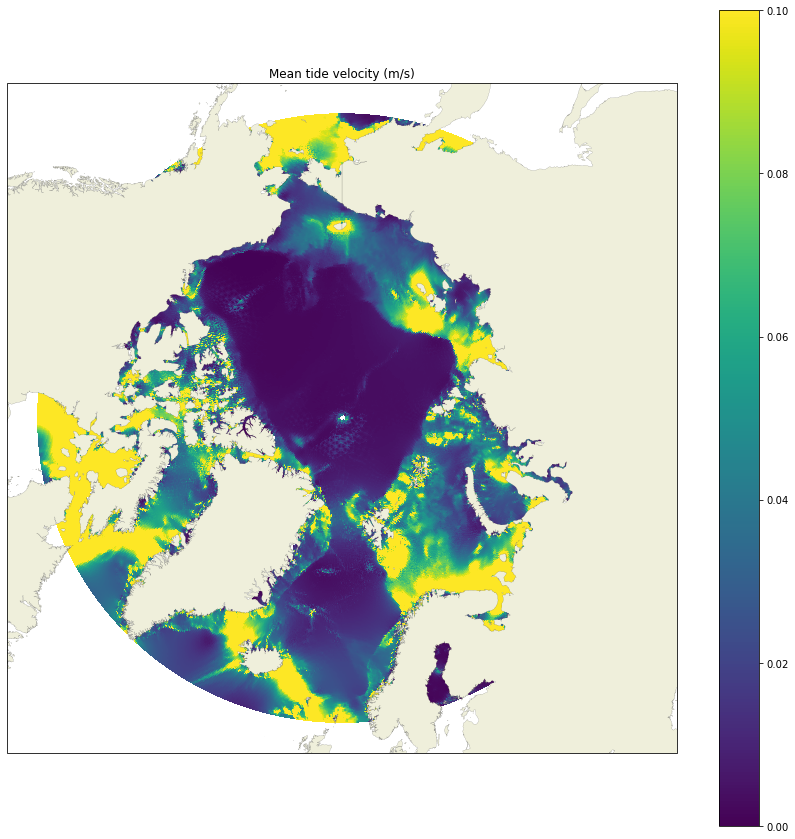

In [45]:
plt.figure(figsize=(15,15))

ax = plt.axes(projection = Projection)
plt.title('Mean tide velocity (m/s)')
s=2
plt.pcolormesh(x_tides[::s,::s], y_tides[::s,::s], tides[::s,::s].T, zorder=0 ,vmin=0, vmax=0.1)#, cmap='seismic')
ax.add_feature(land_10m, zorder=1, edgecolor='black', linewidth=0.1)
plt.colorbar()
# plt.savefig('MeanVelocityTidesArctic.png', dpi = 400)



In [47]:
! pwd


/Users/micheltsamados/Dropbox/ThomasJohnson/MISR_bathymetry


# Tidal mixing